In [2]:
# Naložimo knjižnjice in funkcije
from sage.all import graphs
from metahevristika import simulated_annealing_subpath
import csv
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
from funkcije2 import Ln_graph, build_caterpillar, build_caterpillar2, subpath_number, cubic_graphs, encode_time_hms, build_tree, show_build_tree_tree_layout, spanning_tree, tree_layout_positions_from_tree

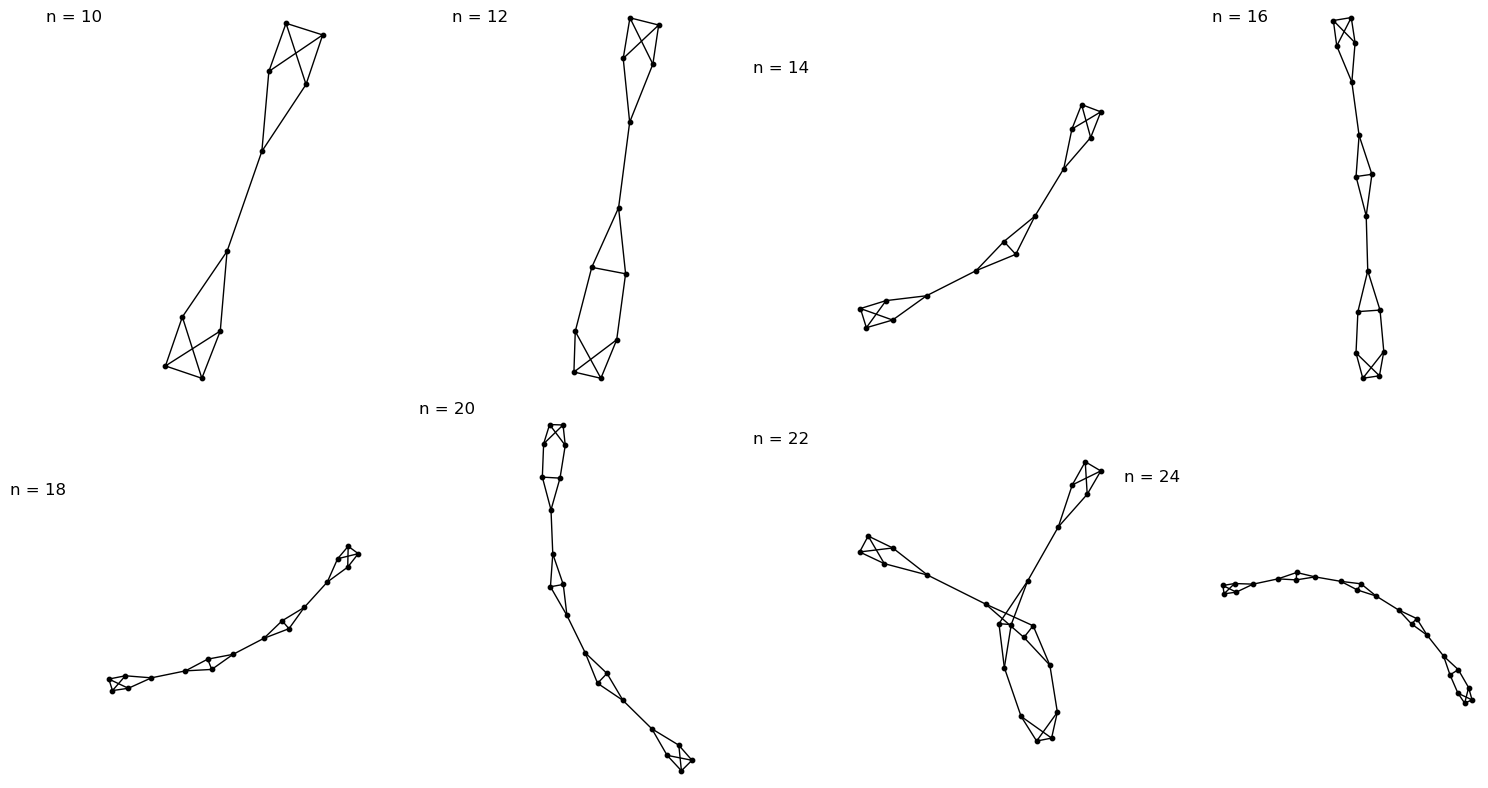

In [2]:
# Preizkusimo funkcijo Ln_graphs

Ln_plots = []
for n in range(10, 27, 2):
    # narisan graf
    Gplot = Ln_graph(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    Ln_plots.append(Gplot + title)

row1 = Ln_plots[:4]
row2 = Ln_plots[4:8]

GA = graphics_array([row1, row2])
GA.show(figsize=(15, 8), axes=False)

In [ ]:
# Preverimo koliko je vseh kubičnih grafov za vsak n
# NE POGANJAJ ZNOVA: Trajalo je 110min
for n in range(4,23,2):
    c = sum(1 for _ in cubic_graphs(n))
    print(f"n={n} število grafov: {c}")

n=4 število grafov: 1
n=6 število grafov: 2
n=8 število grafov: 5
n=10 število grafov: 19
n=12 število grafov: 85
n=14 število grafov: 509
n=16 število grafov: 4060
n=18 število grafov: 41301
n=20 število grafov: 510489
n=22 število grafov: 7319447


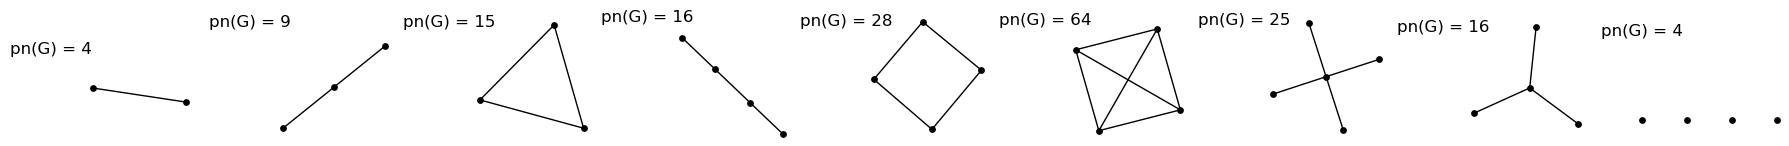

In [3]:
# preverjamo delovanje funkcije subpath_number na enostavnih grafih
graphs_list = [
    # 2. P2: pot s 2 vozlišči
    Graph({0:[1]}),
    # 3. Zvezda S3: center 0, listi 1 in 2
    Graph({0:[1,2]}),
    # 3. C3: trikotnik
    Graph({0:[1,2], 1:[2]}),
    # 4. Potni graf P4
    Graph({0:[1], 1:[2], 2:[3]}),
    # 4. Cikel C4
    Graph({0:[1,3], 1:[2], 2:[3]}),
    # 4. Popoln graf K4
    graphs.CompleteGraph(4),
    # 4. Zvezda S4
    graphs.StarGraph(4),
    # 4. Drevo v obliki črke T
    Graph({0:[1,2,3]}),
    # 4. Diskretni graf na 4 vozliščih
    Graph(4)
]

plots = []
for G in graphs_list:
    # narisan graf
    Gplot = G.plot(
        layout="spring",
        vertex_size=15,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"pn(G) = {subpath_number(G)}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    plots.append(Gplot + title)

# prikaz v eni vrstici
graphics_array([plots]).show(figsize=(18,3), axes=False)

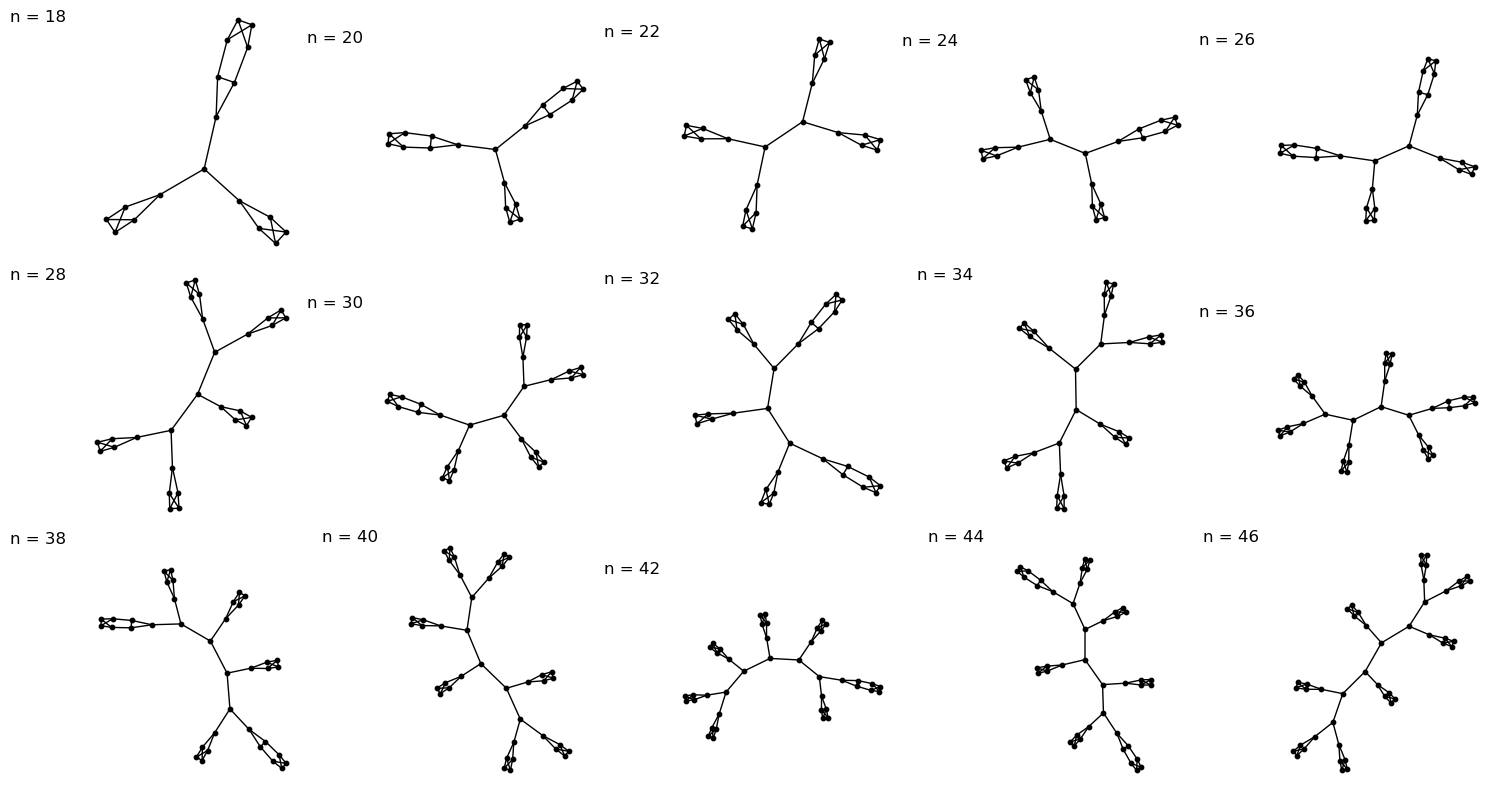

In [6]:
# Preizkusimo funkcijo build_caterpillar

star_plots = []
for n in range(18, 47, 2):
    # narisan graf
    Gplot = build_caterpillar(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=400
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    star_plots.append(Gplot + title)

row1 = star_plots[:5]
row2 = star_plots[5:10]
row3 = star_plots[10:15]

GA = graphics_array([row1, row2, row3])
GA.show(figsize=(15, 8), axes=False)

## Prva točka

Tu je cilj preveriti pravilnost trditve za čim večje n, kjer Ln **primerjamo z vsemi možnimi kubičnimi grafi** na n vozliščih

Shranili bomo:

        - CSV boljših grafov od Ln

Za csv n = 16 je trajalo 1,5 min (4060 grafov), za n = 18: 80 min (41301 grafov) -> **za n = 20 je 510489 grafov**

In [10]:
start_time = time.time()

os.makedirs("Data", exist_ok=True)

for n in range(10, 19, 2):
    file_n = os.path.join("Data", f"boljsi_Ln_n{n}.csv")

    # VAROVALO: če datoteka že obstaja, je ne povozi in preskoči n
    if os.path.exists(file_n):
        print(f"Preskok n = {n} | datoteka že obstaja: {file_n}")
        continue
        
    start = time.time()

    # Ustvari/odpri CSV za trenutni n
    with open(file_n, mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["n", "graph6", "pn(G)", "pn(Ln)", "pn(star)"])

        Ln = Ln_graph(n)
        pn = subpath_number(Ln)
        star = build_catterpillar(n)
        pn2 = subpath_number(star)


        written = 0 

        for G in cubic_graphs(n):
            pnG = subpath_number(G)
            if pnG < pn:
                writer.writerow([n, G.graph6_string(), pnG, pn, pn2])
                written += 1

    elapsed_total = time.time() - start_time
    end = time.time() - start

    print(f"Zaključil n = {n} | datoteka: {file_n} | zapisov: {written+1} | čas n: {encode_time_hms(end)} | skupni: {encode_time_hms(elapsed_total)}")


Preskok n = 10 | datoteka že obstaja: Data/boljsi_Ln_n10.csv
Preskok n = 12 | datoteka že obstaja: Data/boljsi_Ln_n12.csv
Preskok n = 14 | datoteka že obstaja: Data/boljsi_Ln_n14.csv
Preskok n = 16 | datoteka že obstaja: Data/boljsi_Ln_n16.csv
Preskok n = 18 | datoteka že obstaja: Data/boljsi_Ln_n18.csv


In [35]:
# Probamo najti en protiprimer za caterpillar graf za n = 20
n = 20
G = build_caterpillar2(n)
pnG = subpath_number(G)
count = 0
start = time.time()
nasel = False
print(f"Primerjamo s pn(Cat2) = {pnG}")
    
for H in cubic_graphs(n):
    count += 1
    pnH = subpath_number(H)
    if pnH < pnG:
        print(f"Našel boljši graf za n = {n} | pn(H) = {pnH}!",
              f"Šel sem čez {count} grafov")
        H.show(
            vertex_size=10,
            vertex_color="black",
            vertex_labels=False,
            edge_thickness=1,
            figsize=[3, 3],
            iterations=400
        )
        nasel = True
        break

    if count % 10000 == 0:
        elapsed = time.time() - start
        print(f"Obdelal: {count} grafov v {encode_time_hms(elapsed)}")

if not nasel:
    print("Boljšega grafa ni!")


Primerjamo s pn(Cat2) = 11708
Obdelal: 10000 grafov v 00:07:06.221
Obdelal: 20000 grafov v 00:14:27.648
Obdelal: 30000 grafov v 00:22:14.628
Obdelal: 40000 grafov v 00:29:35.814
Obdelal: 50000 grafov v 00:35:44.268
Obdelal: 60000 grafov v 00:42:34.081
Obdelal: 70000 grafov v 00:49:09.584
Obdelal: 80000 grafov v 00:56:37.978
Obdelal: 90000 grafov v 01:04:05.114
Obdelal: 100000 grafov v 01:10:53.640
Obdelal: 110000 grafov v 01:18:30.326
Obdelal: 120000 grafov v 01:25:39.490
Obdelal: 130000 grafov v 01:32:43.527
Obdelal: 140000 grafov v 01:39:43.527
Obdelal: 150000 grafov v 01:46:13.215
Obdelal: 160000 grafov v 01:52:35.768
Obdelal: 170000 grafov v 01:58:02.642
Obdelal: 180000 grafov v 02:04:41.769
Obdelal: 190000 grafov v 02:11:30.471
Obdelal: 200000 grafov v 02:17:39.008
Obdelal: 210000 grafov v 02:23:39.574
Obdelal: 220000 grafov v 02:30:03.610
Obdelal: 230000 grafov v 02:36:50.532
Obdelal: 240000 grafov v 02:43:48.752
Obdelal: 250000 grafov v 02:51:34.025
Obdelal: 260000 grafov v 02:5

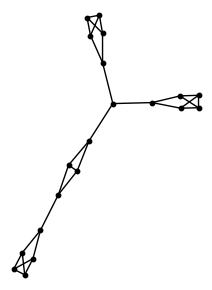

In [4]:
build_caterpillar2(20).show(
            vertex_size=10,
            vertex_color="black",
            vertex_labels=False,
            edge_thickness=1,
            figsize=[3, 3],
            iterations=400
        )

In [36]:
folder = "Data"
dfs = []

for file in os.listdir(folder):
    if file.lower().startswith("boljsi_"):
        path = os.path.join(folder, file)
        df = pd.read_csv(path)
        df["source_file"] = file  # dodamo informacijo, iz katere datoteke prihaja
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

In [37]:
df_f = df[df["n"] == 18].copy()
df_f = df_f.sort_values("pn(G)")
df_min3 = df_f.head(int(3))
slov = dict(zip(df_min3["graph6"], df_min3["pn(G)"]))

for G6, pn in slov.items():
    G = Graph(G6)
    print(pn)

7072
7296
7380


## Simulated annealing

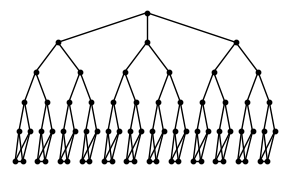

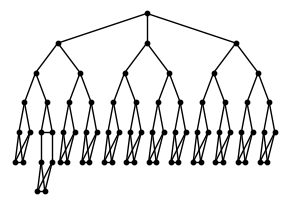

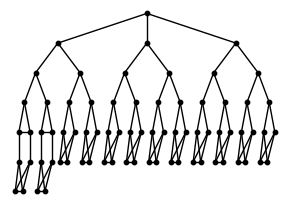

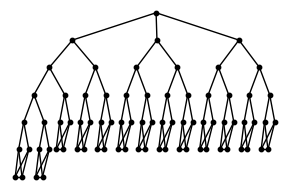

In [17]:
for n in range(70, 77, 2):
    show_build_tree_tree_layout(n, root=0, figsize=[3,3])

In [5]:
for n in range(16, 41, 2):
    Ln = Ln_graph(n)
    T = build_tree(n)
    C1 = build_caterpillar(n)
    C2 = build_caterpillar2(n)
    pnLn = subpath_number(Ln)
    pnT = subpath_number(T)
    pnC1 = subpath_number(C1)
    pnC2 = subpath_number(C2)

    print(f"n = {n} | pn(Ln) = {pnLn} | pn(Tree) = {pnT} | pn(Cat1) = {pnC1} | pn(Cat2) = {pnC2}")

n = 16 | pn(Ln) = 12744 | pn(Tree) = 3640 | pn(Cat1) = 3640 | pn(Cat2) = 3640
n = 18 | pn(Ln) = 22532 | pn(Tree) = 7072 | pn(Cat1) = 7072 | pn(Cat2) = 7072
n = 20 | pn(Ln) = 51532 | pn(Tree) = 12816 | pn(Cat1) = 12816 | pn(Cat2) = 11708
n = 22 | pn(Ln) = 90760 | pn(Tree) = 7156 | pn(Cat1) = 7156 | pn(Cat2) = 7156
n = 24 | pn(Ln) = 206800 | pn(Tree) = 12220 | pn(Cat1) = 12220 | pn(Cat2) = 12220
n = 26 | pn(Ln) = 363788 | pn(Tree) = 19596 | pn(Cat1) = 19596 | pn(Cat2) = 19064
n = 28 | pn(Ln) = 827988 | pn(Tree) = 11824 | pn(Cat1) = 11824 | pn(Cat2) = 11824
n = 30 | pn(Ln) = 1456016 | pn(Tree) = 18520 | pn(Cat1) = 18520 | pn(Cat2) = 18520
n = 32 | pn(Ln) = 3312856 | pn(Tree) = 27528 | pn(Cat1) = 27528 | pn(Cat2) = 27572
n = 34 | pn(Ln) = 5825044 | pn(Tree) = 17644 | pn(Cat1) = 17644 | pn(Cat2) = 17644
n = 36 | pn(Ln) = 13252444 | pn(Tree) = 25972 | pn(Cat1) = 25972 | pn(Cat2) = 25972
n = 38 | pn(Ln) = 23301272 | pn(Tree) = 36612 | pn(Cat1) = 36612 | pn(Cat2) = 37232
n = 40 | pn(Ln) = 5301


=== ZAČENJAM n = 10 ===
[AUTO] mean_dE=224.26, T0=323.54, T_end=20.00, alpha=0.999861
Korak 2000, T=244.9268, E=1276, best_E=1276, sprejetih slabših = 380/1264 (30.06 %)
Korak 4000, T=185.4158, E=1276, best_E=1276, sprejetih slabših = 153/1476 (10.37 %)
Korak 6000, T=140.3644, E=1276, best_E=1276, sprejetih slabših = 32/1615 (1.98 %)
Korak 8000, T=106.2594, E=1276, best_E=1276, sprejetih slabših = 4/1684 (0.24 %)
Korak 10000, T=80.4411, E=1276, best_E=1276, sprejetih slabših = 0/1658 (0.00 %)
Korak 12000, T=60.8959, E=1276, best_E=1276, sprejetih slabših = 0/1674 (0.00 %)
Korak 14000, T=46.0998, E=1276, best_E=1276, sprejetih slabših = 0/1676 (0.00 %)
Korak 16000, T=34.8987, E=1276, best_E=1276, sprejetih slabših = 0/1631 (0.00 %)
Korak 18000, T=26.4192, E=1276, best_E=1276, sprejetih slabših = 0/1633 (0.00 %)
Korak 20000, T=20.0000, E=1276, best_E=1276, sprejetih slabših = 0/1661 (0.00 %)
Zaključil n=10 | pn(C1)=1276 | Best_E=1276 | čas=00:00:18.734s


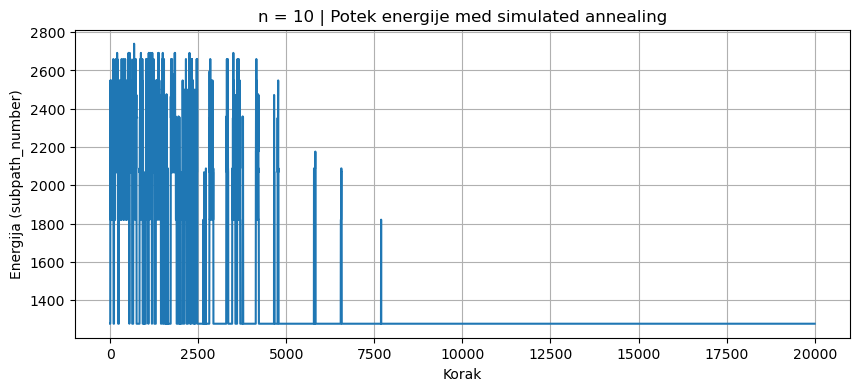


=== ZAČENJAM n = 12 ===
[AUTO] mean_dE=588.31, T0=848.75, T_end=20.00, alpha=0.999813
Korak 2000, T=583.4537, E=3076, best_E=3076, sprejetih slabših = 339/1435 (23.62 %)
Korak 4000, T=401.0802, E=3300, best_E=3076, sprejetih slabših = 215/1529 (14.06 %)
Korak 6000, T=275.7123, E=3408, best_E=3076, sprejetih slabših = 110/1633 (6.74 %)
Korak 8000, T=189.5313, E=3076, best_E=3076, sprejetih slabših = 84/1656 (5.07 %)
Korak 10000, T=130.2884, E=3408, best_E=3076, sprejetih slabših = 73/1678 (4.35 %)
Korak 12000, T=89.5634, E=3076, best_E=3076, sprejetih slabših = 45/1679 (2.68 %)
Korak 14000, T=61.5681, E=3076, best_E=3076, sprejetih slabših = 29/1701 (1.70 %)
Korak 16000, T=42.3234, E=3076, best_E=3076, sprejetih slabših = 9/1725 (0.52 %)
Korak 18000, T=29.0941, E=3076, best_E=3076, sprejetih slabših = 3/1739 (0.17 %)
Korak 20000, T=20.0000, E=3076, best_E=3076, sprejetih slabših = 1/1743 (0.06 %)
Zaključil n=12 | pn(C1)=3076 | Best_E=3076 | čas=00:00:39.864s


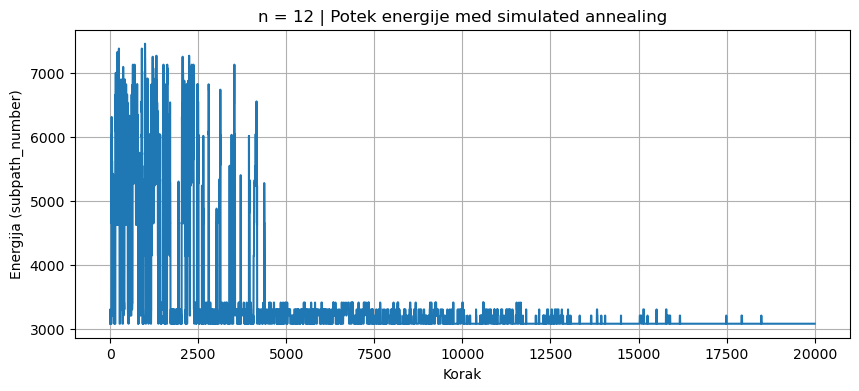


=== ZAČENJAM n = 14 ===
[AUTO] mean_dE=1198.23, T0=1728.68, T_end=20.00, alpha=0.999777
Korak 2000, T=1106.7423, E=13104, best_E=5504, sprejetih slabših = 290/1524 (19.03 %)
Korak 4000, T=708.5622, E=9008, best_E=5504, sprejetih slabših = 148/1642 (9.01 %)
Korak 6000, T=453.6381, E=7428, best_E=5504, sprejetih slabših = 77/1736 (4.44 %)
Korak 8000, T=290.4297, E=5504, best_E=5504, sprejetih slabših = 54/1752 (3.08 %)
Korak 10000, T=185.9399, E=6180, best_E=5504, sprejetih slabših = 7/1806 (0.39 %)
Korak 12000, T=119.0430, E=5504, best_E=5504, sprejetih slabših = 2/1787 (0.11 %)
Korak 14000, T=76.2141, E=5504, best_E=5504, sprejetih slabših = 0/1777 (0.00 %)
Korak 16000, T=48.7941, E=5504, best_E=5504, sprejetih slabših = 0/1805 (0.00 %)
Korak 18000, T=31.2391, E=5504, best_E=5504, sprejetih slabših = 0/1802 (0.00 %)
Korak 20000, T=20.0000, E=5504, best_E=5504, sprejetih slabših = 0/1816 (0.00 %)
Zaključil n=14 | pn(C1)=7188 | Best_E=5504 | čas=00:01:07.202s


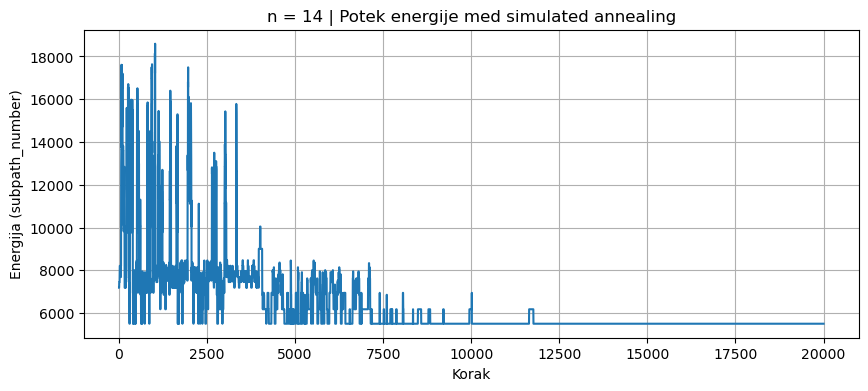


=== ZAČENJAM n = 16 ===
[AUTO] mean_dE=3962.78, T0=5717.08, T_end=20.00, alpha=0.999717
Korak 2000, T=3247.5807, E=17196, best_E=3640, sprejetih slabših = 454/1421 (31.95 %)
Korak 4000, T=1844.7839, E=17800, best_E=3640, sprejetih slabših = 206/1631 (12.63 %)
Korak 6000, T=1047.9271, E=10552, best_E=3640, sprejetih slabših = 62/1784 (3.48 %)
Korak 8000, T=595.2736, E=3640, best_E=3640, sprejetih slabših = 0/1841 (0.00 %)
Korak 10000, T=338.1444, E=3640, best_E=3640, sprejetih slabših = 0/1852 (0.00 %)
Korak 12000, T=192.0825, E=3640, best_E=3640, sprejetih slabših = 0/1845 (0.00 %)
Korak 14000, T=109.1122, E=3640, best_E=3640, sprejetih slabših = 0/1862 (0.00 %)
Korak 16000, T=61.9810, E=3640, best_E=3640, sprejetih slabših = 0/1849 (0.00 %)
Korak 18000, T=35.2082, E=3640, best_E=3640, sprejetih slabših = 0/1859 (0.00 %)
Korak 20000, T=20.0000, E=3640, best_E=3640, sprejetih slabših = 0/1844 (0.00 %)
Zaključil n=16 | pn(C1)=3640 | Best_E=3640 | čas=00:01:59.114s


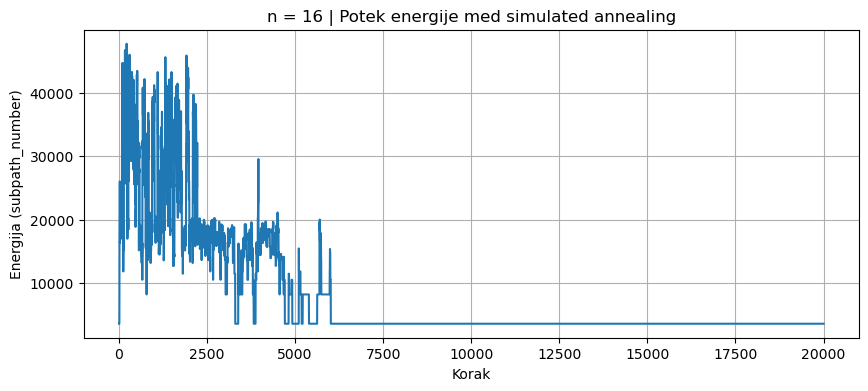


=== ZAČENJAM n = 18 ===
[AUTO] mean_dE=7903.11, T0=11401.78, T_end=20.00, alpha=0.999683
Korak 2000, T=6044.7503, E=19980, best_E=7072, sprejetih slabših = 407/1511 (26.94 %)
Korak 4000, T=3204.6758, E=45240, best_E=7072, sprejetih slabših = 222/1660 (13.37 %)
Korak 6000, T=1698.9861, E=7072, best_E=7072, sprejetih slabših = 65/1783 (3.65 %)
Korak 8000, T=900.7320, E=7692, best_E=7072, sprejetih slabših = 49/1818 (2.70 %)
Korak 10000, T=477.5307, E=7296, best_E=7072, sprejetih slabših = 33/1833 (1.80 %)
Korak 12000, T=253.1670, E=7296, best_E=7072, sprejetih slabših = 28/1832 (1.53 %)
Korak 14000, T=134.2186, E=7072, best_E=7072, sprejetih slabših = 18/1847 (0.97 %)
Korak 16000, T=71.1571, E=7072, best_E=7072, sprejetih slabših = 6/1868 (0.32 %)
Korak 18000, T=37.7246, E=7072, best_E=7072, sprejetih slabših = 2/1863 (0.11 %)
Korak 20000, T=20.0000, E=7072, best_E=7072, sprejetih slabših = 0/1870 (0.00 %)
Zaključil n=18 | pn(C1)=7072 | Best_E=7072 | čas=00:04:08.592s


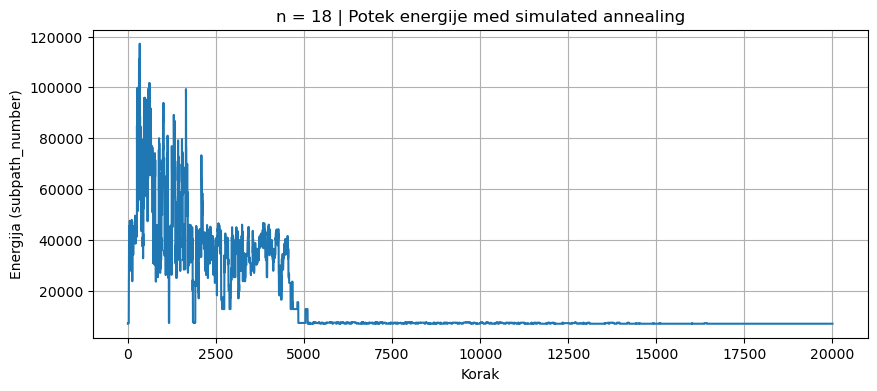


=== ZAČENJAM n = 20 ===
[AUTO] mean_dE=19794.15, T0=28556.92, T_end=20.00, alpha=0.999637
Korak 2000, T=13811.5749, E=81072, best_E=12816, sprejetih slabših = 443/1485 (29.83 %)
Korak 4000, T=6679.9786, E=15556, best_E=11708, sprejetih slabših = 167/1725 (9.68 %)
Korak 6000, T=3230.7767, E=11708, best_E=11708, sprejetih slabših = 93/1811 (5.14 %)
Korak 8000, T=1562.5676, E=14212, best_E=11708, sprejetih slabših = 81/1825 (4.44 %)
Korak 10000, T=755.7370, E=14012, best_E=11708, sprejetih slabših = 43/1861 (2.31 %)
Korak 12000, T=365.5128, E=11708, best_E=11708, sprejetih slabših = 5/1856 (0.27 %)
Korak 14000, T=176.7805, E=11708, best_E=11708, sprejetih slabših = 0/1865 (0.00 %)
Korak 16000, T=85.5000, E=11708, best_E=11708, sprejetih slabših = 0/1863 (0.00 %)
Korak 18000, T=41.3522, E=11708, best_E=11708, sprejetih slabših = 0/1864 (0.00 %)
Korak 20000, T=20.0000, E=11708, best_E=11708, sprejetih slabših = 0/1851 (0.00 %)
Zaključil n=20 | pn(C1)=12816 | Best_E=11708 | čas=00:07:35.699

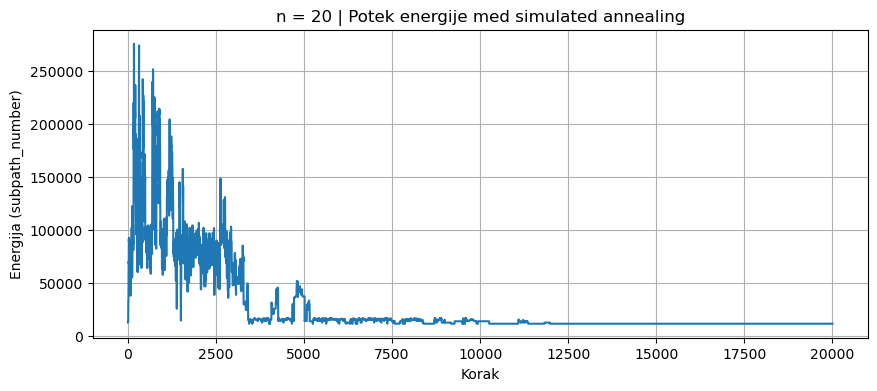


=== ZAČENJAM n = 22 ===
[AUTO] mean_dE=46014.29, T0=66384.59, T_end=20.00, alpha=0.999595
Korak 2000, T=29509.6153, E=260048, best_E=7156, sprejetih slabših = 435/1487 (29.25 %)
Korak 4000, T=13117.7642, E=27532, best_E=7156, sprejetih slabših = 220/1707 (12.89 %)
Korak 6000, T=5831.1752, E=29184, best_E=7156, sprejetih slabših = 101/1812 (5.57 %)
Korak 8000, T=2592.1037, E=23448, best_E=7156, sprejetih slabših = 82/1824 (4.50 %)
Korak 10000, T=1152.2551, E=22184, best_E=7156, sprejetih slabših = 35/1853 (1.89 %)
Korak 12000, T=512.2063, E=20580, best_E=7156, sprejetih slabših = 24/1867 (1.29 %)
Korak 14000, T=227.6885, E=20580, best_E=7156, sprejetih slabših = 4/1898 (0.21 %)
Korak 16000, T=101.2133, E=20580, best_E=7156, sprejetih slabših = 0/1889 (0.00 %)
Korak 18000, T=44.9918, E=20580, best_E=7156, sprejetih slabših = 0/1888 (0.00 %)
Korak 20000, T=20.0000, E=20580, best_E=7156, sprejetih slabših = 0/1884 (0.00 %)
Zaključil n=22 | pn(C1)=7156 | Best_E=7156 | čas=00:14:32.943s


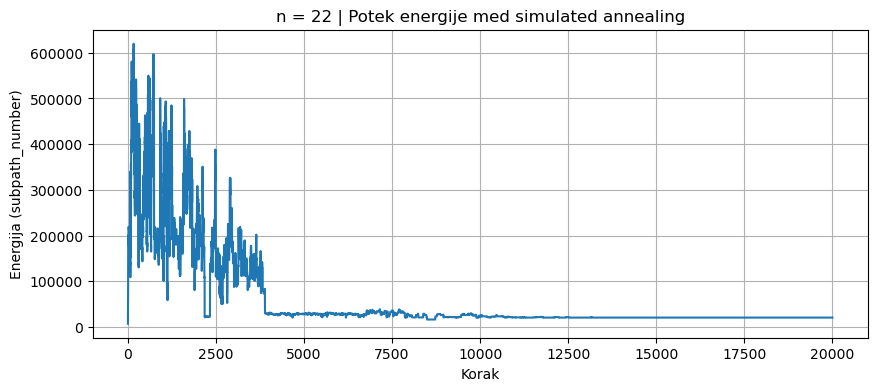


=== ZAČENJAM n = 24 ===
[AUTO] mean_dE=83549.01, T0=120535.74, T_end=20.00, alpha=0.999565
Korak 2000, T=50478.5953, E=246164, best_E=12220, sprejetih slabših = 366/1558 (23.49 %)
Korak 4000, T=21139.6930, E=58264, best_E=12220, sprejetih slabših = 178/1728 (10.30 %)
Korak 6000, T=8852.9924, E=44500, best_E=12220, sprejetih slabših = 109/1792 (6.08 %)
Korak 8000, T=3707.5030, E=45260, best_E=12220, sprejetih slabših = 98/1810 (5.41 %)
Korak 10000, T=1552.6477, E=33092, best_E=12220, sprejetih slabših = 62/1854 (3.34 %)
Korak 12000, T=650.2260, E=33092, best_E=12220, sprejetih slabših = 23/1896 (1.21 %)
Korak 14000, T=272.3051, E=31764, best_E=12220, sprejetih slabših = 10/1893 (0.53 %)
Korak 16000, T=114.0374, E=31764, best_E=12220, sprejetih slabših = 0/1904 (0.00 %)
Korak 18000, T=47.7572, E=31764, best_E=12220, sprejetih slabših = 0/1908 (0.00 %)
Korak 20000, T=20.0000, E=31764, best_E=12220, sprejetih slabših = 0/1898 (0.00 %)
Zaključil n=24 | pn(C1)=12220 | Best_E=12220 | čas=00:

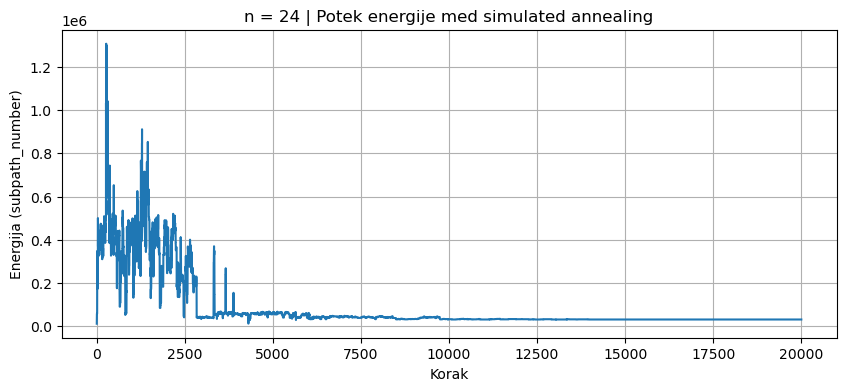


=== ZAČENJAM n = 26 ===
[AUTO] mean_dE=193820.86, T0=279624.40, T_end=20.00, alpha=0.999523
Korak 2000, T=107651.6163, E=792424, best_E=19596, sprejetih slabših = 485/1530 (31.70 %)
Korak 4000, T=41444.4183, E=123308, best_E=19596, sprejetih slabših = 213/1674 (12.72 %)
Korak 6000, T=15955.5413, E=77792, best_E=19596, sprejetih slabših = 115/1777 (6.47 %)
Korak 8000, T=6142.6679, E=51532, best_E=19596, sprejetih slabših = 104/1823 (5.70 %)
Korak 10000, T=2364.8442, E=46888, best_E=19596, sprejetih slabših = 44/1876 (2.35 %)
Korak 12000, T=910.4331, E=46888, best_E=19596, sprejetih slabših = 16/1912 (0.84 %)
Korak 14000, T=350.5044, E=46888, best_E=19596, sprejetih slabših = 8/1915 (0.42 %)
Korak 16000, T=134.9395, E=46888, best_E=19596, sprejetih slabših = 0/1919 (0.00 %)
Korak 18000, T=51.9499, E=46888, best_E=19596, sprejetih slabših = 0/1930 (0.00 %)
Korak 20000, T=20.0000, E=46888, best_E=19596, sprejetih slabših = 0/1924 (0.00 %)
Zaključil n=26 | pn(C1)=19596 | Best_E=19596 | čas

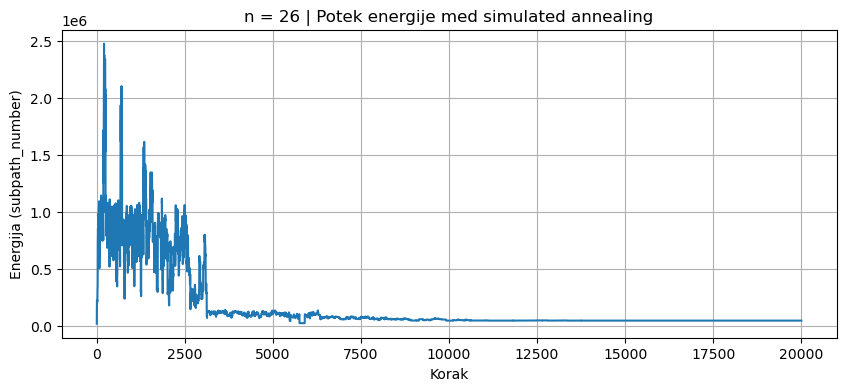

In [8]:
# Ustvari mapo Data
os.makedirs("Data", exist_ok=True)

overview_path = "Data/SA_results2.csv"

# Zapiši glavo CSV-ja
with open(overview_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow([
        "n", "best_G", "best_pn", "pn(Ln)", "pn(caterpillar)", "pn(caterpillar2)", "pn(tree)"
    ])

for n in range(10, 27, 2):

    print(f"\n=== ZAČENJAM n = {n} ===")

    Ln = Ln_graph(n)
    pnLn = subpath_number(Ln)
    C1 = build_caterpillar(n)
    pnC1 = subpath_number(C1)
    pnC2 = subpath_number(build_caterpillar2(n))
    if n >= 16:
        pnT = subpath_number(build_tree(n))
    else:
        pnT = None

    start = time.time()
    best_G, best_E, history = simulated_annealing_subpath(
        C1,
        steps=20000,
        max_tries=1000,
        T_end_target=20,
        verbose=True
    )
    elapsed = time.time() - start


    # Shrani povzetek
    with open(overview_path, "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerow([
            n,
            best_G.graph6_string(),
            best_E,
            pnLn,
            pnC1,
            pnC2,
            pnT
        ])

    print(f"Zaključil n={n} | pn(C1)={pnC1} | Best_E={best_E} | čas={encode_time_hms(elapsed)}s")
    plt.figure(figsize=(10, 4))
    plt.plot(history)
    plt.xlabel("Korak")
    plt.ylabel("Energija (subpath_number)")
    plt.title(f"n = {n} | Potek energije med simulated annealing")
    plt.grid(True)
    plt.show()
